In [1]:

import math,time,random,datetime


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import warnings 
warnings.filterwarnings('ignore')

In [2]:
np.__version__

'1.19.5'

In [256]:
test=pd.read_csv('/media/sanskar/Seagate Expansion Drive/CS229/titanic/test.csv')
#train=pd.read_csv('/media/sanskar/Seagate Expansion Drive/CS229/titanic/train.csv')
gs=pd.read_csv('/media/sanskar/Seagate Expansion Drive/CS229/titanic/gender_submission.csv')


In [4]:
gs.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
len(train)

891

In [8]:
train.loc[train['PassengerId']==891]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
import missingno

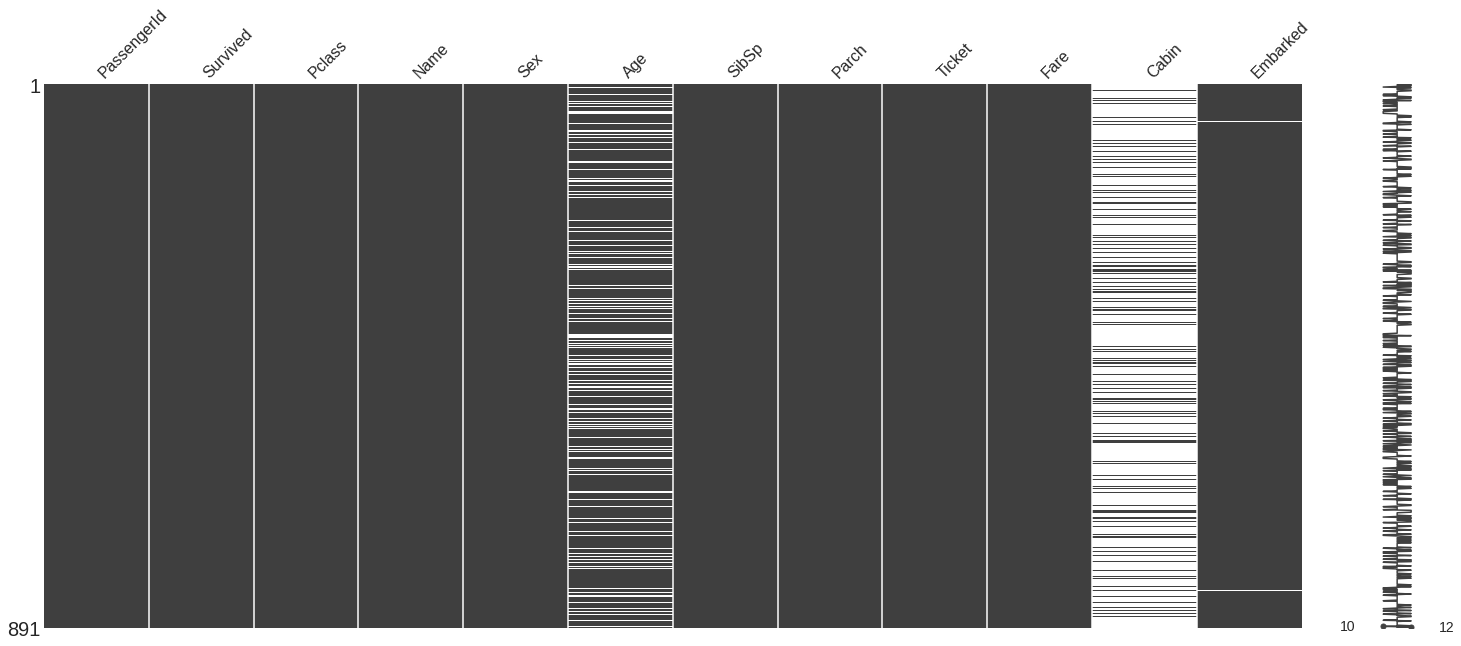

In [11]:
missingno.matrix(train)

In [12]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


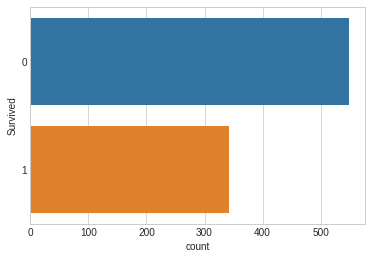

In [13]:
sns.countplot(y='Survived',data=train)
print(train.Survived.value_counts())

In [14]:
df_bin=pd.DataFrame()
df_con=pd.DataFrame()

In [15]:
df_bin['Survived']=train['Survived']
df_con['Survived']=train['Survived']

In [16]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [17]:


df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


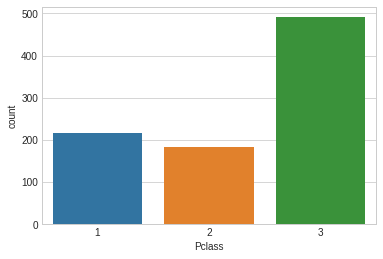

In [19]:
sns.countplot(train.Pclass)

In [20]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
df_bin['Pclass']=train['Pclass']
df_con['Pclass']=train['Pclass']

In [22]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [23]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [24]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [25]:
dict={
    'Mr':0,
    'Miss':0,
    'Master':0,
    'Mrs':0,
    'Don':0,
    'Rev':0
    
}

In [26]:
for name in train['Name']:
    if name.find('Mrs.')!=-1:
        dict['Mrs']+=1
    elif name.find('Master.')!=-1:
        dict['Master']+=1
    elif name.find('Miss.')!=-1:
        dict['Miss']+=1
    elif name.find('Don.')!=-1:
        dict['Don']+=1
    elif name.find('Mr.')!=-1:
        dict['Mr']+=1
    elif name.find('Rev.')!=-1:
        dict['Rev']+=1
    else:
        print(name)
    
        
        
            
                
                
                

Minahan, Dr. William Edward
Moraweck, Dr. Ernest
Aubart, Mme. Leontine Pauline
Pain, Dr. Alfred
Reynaldo, Ms. Encarnacion
Peuchen, Major. Arthur Godfrey
Butt, Major. Archibald Willingham
Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
Stahelin-Maeglin, Dr. Max
Sagesser, Mlle. Emma
Simonius-Blumer, Col. Oberst Alfons
Frauenthal, Dr. Henry William
Weir, Col. John
Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")
Crosby, Capt. Edward Gifford
Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)
Brewe, Dr. Arthur Jackson
Leader, Dr. Alice (Farnham)
Reuchlin, Jonkheer. John George


In [27]:
dict.values()

dict_values([517, 182, 40, 125, 1, 6])

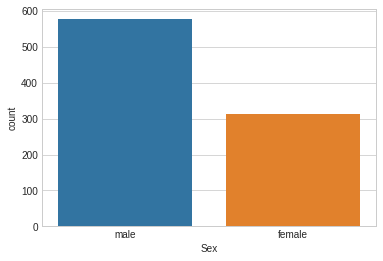

In [28]:
sns.countplot(train.Sex)

In [29]:
df_bin['Sex']=train['Sex']
df_bin['Sex']=np.where(train['Sex']=='female',1,0)
df_con['Sex']=train['Sex']

In [30]:
df_bin.head()


,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [31]:
df_con.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


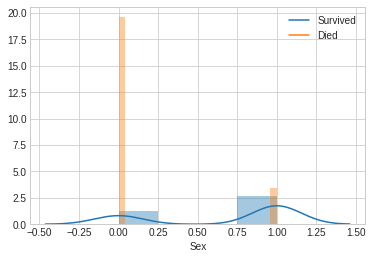

In [32]:
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'], kde_kws={'label':'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'], kde_kws={'label':'Died'})

In [33]:
def plot_count_dist(data,bin_df,label_column,target_column,figsize=(20,5), use_bin_df=False):
    
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(x=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

In [34]:
train['SibSp'].isnull().sum()

0

In [35]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [36]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

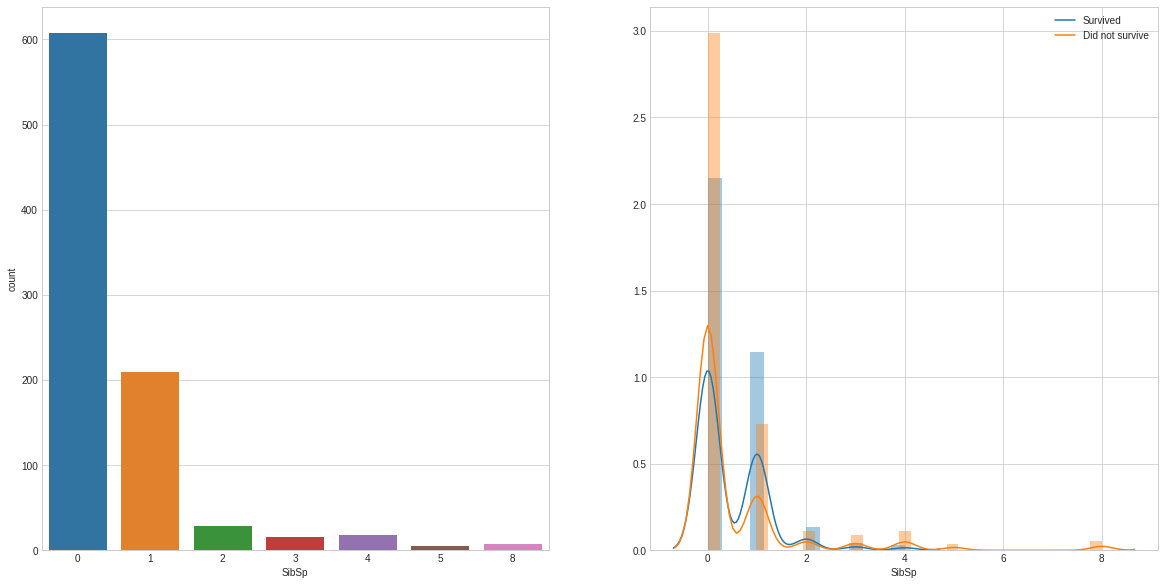

In [37]:
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

In [38]:
train['Parch'].isnull().sum()

0

In [39]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

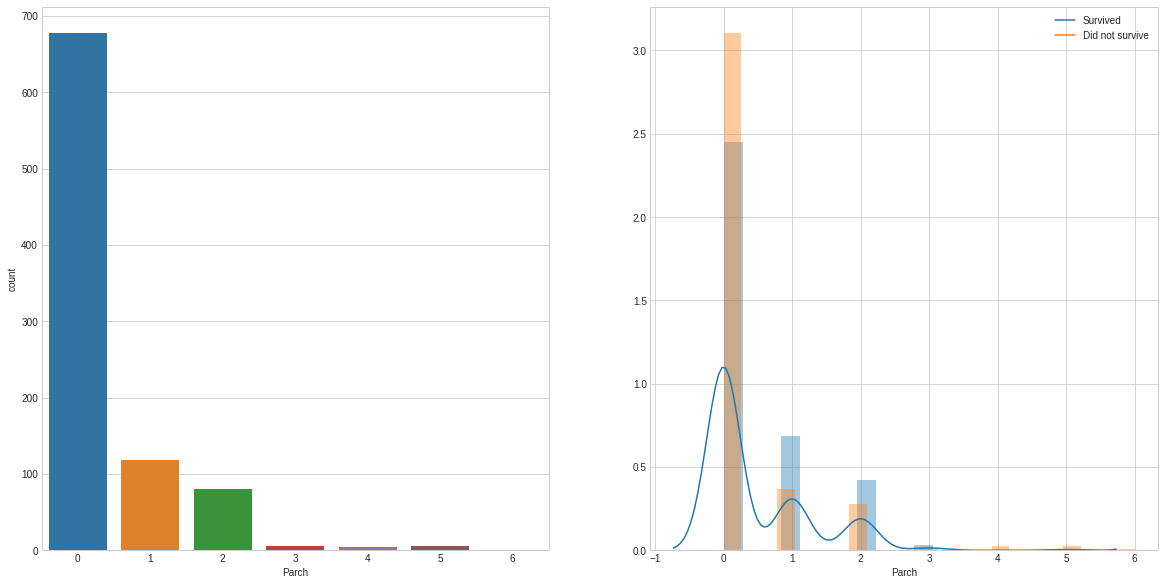

In [40]:
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

In [41]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

In [42]:
train['Ticket'].isnull().sum()

0

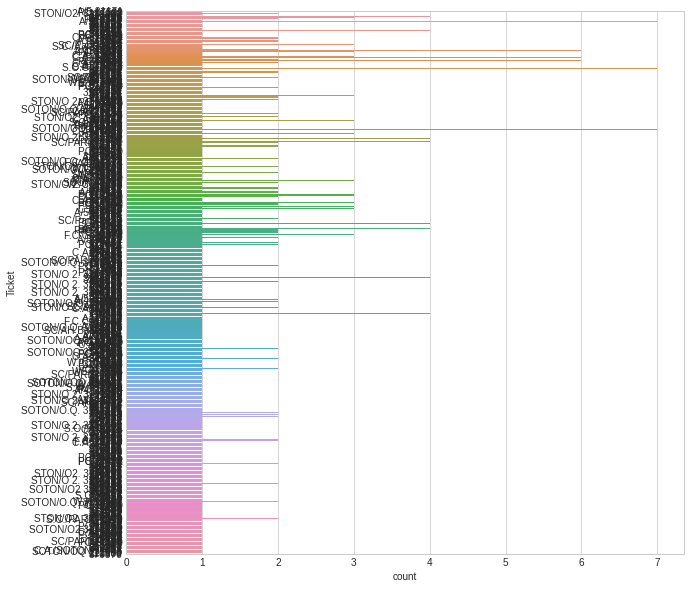

In [43]:
plt.figure(figsize=(10,10))
sns.countplot(y=train['Ticket'])
#not using ticket as too varied and difficult to use!

In [44]:
train['Fare'].isnull().sum()

0

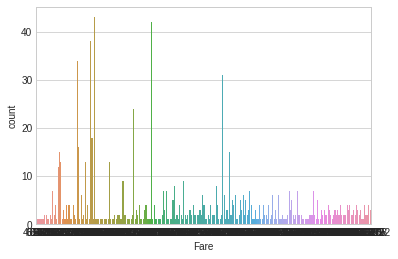

In [45]:
sns.countplot(train['Fare'])

In [46]:
df_con['Fare']=train['Fare']
df_bin['Fare']=pd.cut(train['Fare'],bins=5)

In [47]:
df_bin['Fare'].value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

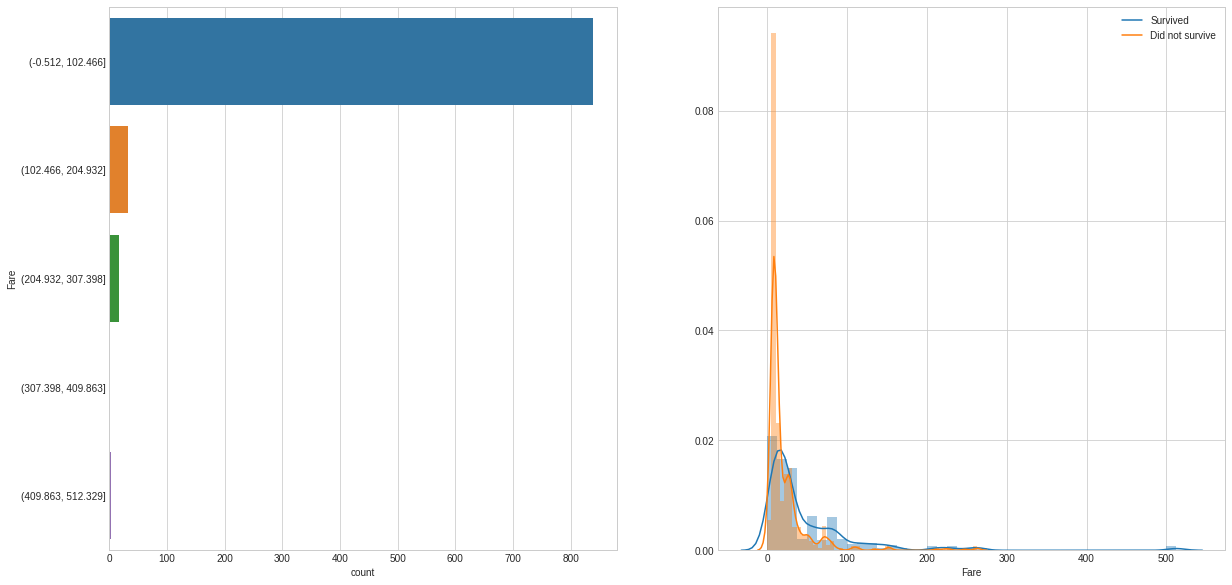

In [48]:
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
#cabin is mostly missing and hence pointless to keep!
#move on to next feature

In [51]:
train['Embarked'].isnull().sum()

2

In [52]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

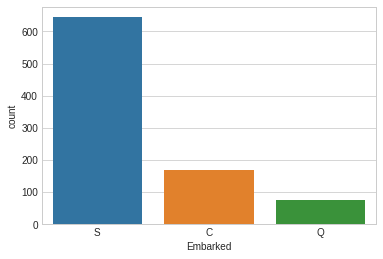

In [53]:
sns.countplot(train['Embarked'])

In [58]:
print(len(df_bin))
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']
print(len(df_bin))

891
891


In [59]:
print(len(df_bin))
df_bin=df_bin.dropna(subset=['Embarked'])

df_con=df_con.dropna(subset=['Embarked'])
print(len(df_bin))


891
889


In [71]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
one_hot_cols.remove('Sex')


In [72]:
one_hot_cols

['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [73]:
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [111]:
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')
df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [112]:
df_con_enc=pd.concat([df_con,df_embarked_one_hot,df_sex_one_hot,df_plcass_one_hot],axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
#df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)


In [113]:
df_con_enc

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,3,male,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,1,female,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,1,3,female,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,1,female,1,0,53.1000,S,0,0,1,1,0,1,0,0
4,0,3,male,0,0,8.0500,S,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,0,0,1,0,1,0,1,0
887,1,1,female,0,0,30.0000,S,0,0,1,1,0,1,0,0
888,0,3,female,1,2,23.4500,S,0,0,1,1,0,0,0,1
889,1,1,male,0,0,30.0000,C,1,0,0,0,1,1,0,0


In [114]:
df_con_enc=df_con_enc.drop(['Pclass' , 'Sex' , 'Embarked'], axis=1)

In [115]:
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

In [116]:
selected_df=df_con_enc

In [117]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [118]:
X_train=selected_df.drop('Survived' ,axis=1)
Y_train=selected_df['Survived']

In [119]:
X_train

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,0,0,1,0,1,0,1,0
887,0,0,30.0000,0,0,1,1,0,1,0,0
888,1,2,23.4500,0,0,1,1,0,0,0,1
889,0,0,30.0000,1,0,0,0,1,1,0,0


In [120]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [268]:
def fit_ml_algo(algo , X_train , Y_train , cv):
    model=algo.fit(X_train,Y_train)
    acc = round(model.score(X_train, Y_train) * 100, 2)
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  Y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
        # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(Y_train, train_pred,normalize=True) * 100, 2)
    
    return train_pred, acc, acc_cv,model

In [269]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log, model= fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

pred=model.predict(df_test)
len(pred)


Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:01.885465


418

In [271]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = pred
# our model predictions on the test dataset
submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [275]:
submission.to_csv('sub.csv' , index=False)

In [253]:
test.loc[test['PassengerId']==893]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,NaN,S,0,0,1,1,0,0,0,1


In [169]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  Y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))


Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.142109


In [172]:
#naive bayes
start_time=time.time()
train_pred_gaussian,acc_gaussian,acc_cv_gaussian=fit_ml_algo(GaussianNB(),X_train, Y_train,10)

gaussian_time=(time.time()-start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.051877


In [188]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [189]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [190]:
test_embarked_one_hot=pd.get_dummies(test['Embarked'], prefix='embarked')
test_sex_one_hot=pd.get_dummies(test['Sex'], prefix='sex')
test_pclass_one_hot=pd.get_dummies(test['Pclass'], prefix='pclass')

In [193]:
test_pclass_one_hot.head()

,pclass_1,pclass_2,pclass_3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [257]:
test=pd.concat([test,
                test_embarked_one_hot,
                test_sex_one_hot,
                test_pclass_one_hot], axis=1)

In [258]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0,1,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0,1,0,1,0,0,1


In [200]:
cols=X_train.columns

In [259]:
df_test=test[cols]

In [260]:
df_test.head()



,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,0,7.8292,0,1,0,0,1,0,0,1
1,1,0,7.0000,0,0,1,1,0,0,0,1
2,0,0,9.6875,0,1,0,0,1,0,1,0
3,0,0,8.6625,0,0,1,0,1,0,0,1
4,1,1,12.2875,0,0,1,1,0,0,0,1


In [205]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


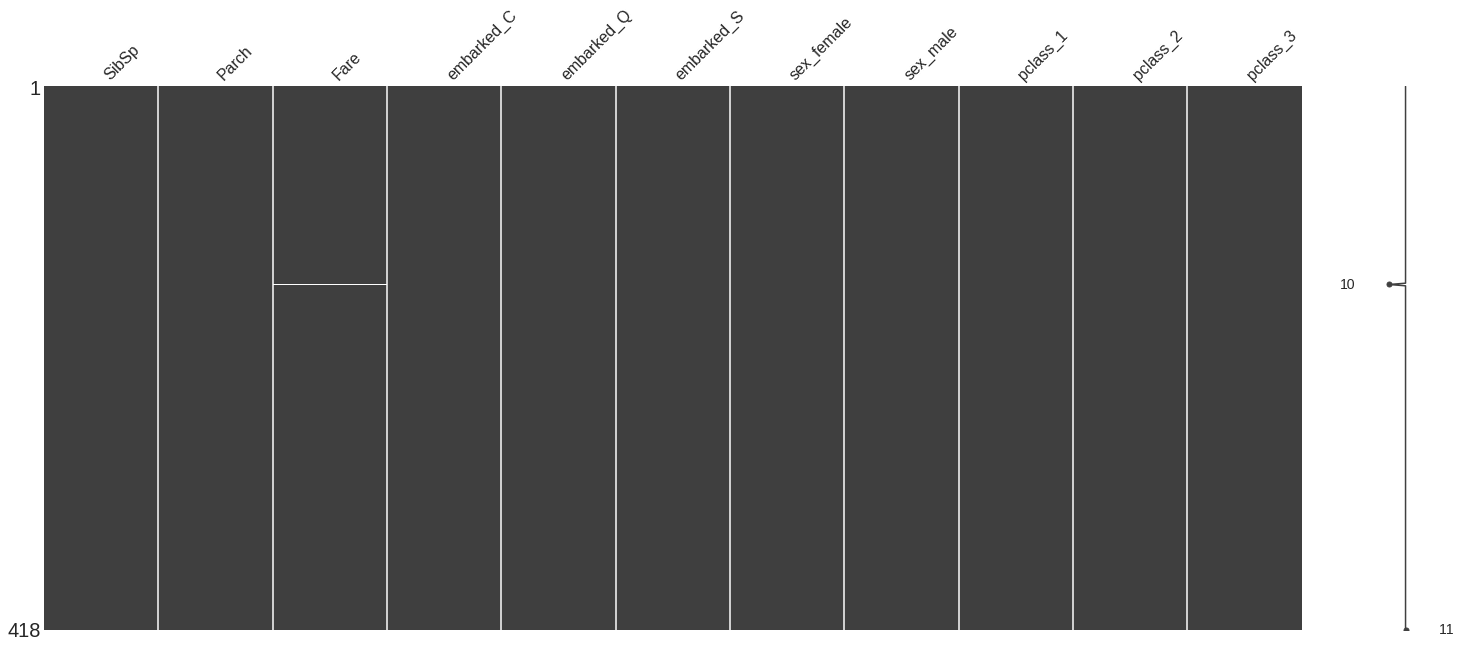

In [261]:
missingno.matrix(df_test)

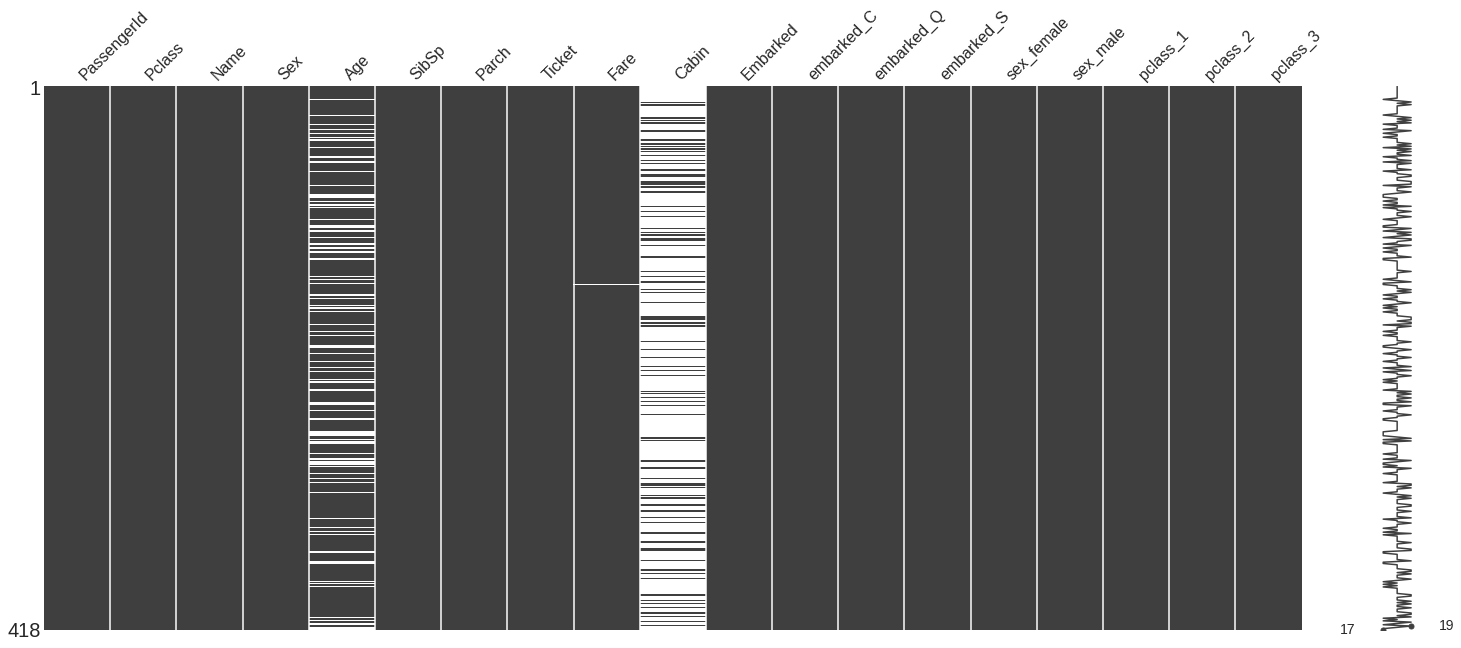

In [230]:
missingno.matrix(test)

In [267]:
# drop row row with missing fare 
print(df_test.shape)
df_test['Fare']
df_test.fillna(method='bfill' , inplace=True)
df_test['Fare'].isnull().sum()

(418, 11)


0